In [1]:
from HeaderP import *
import os

In [12]:
kepler = pd.read_table('https://arxiv.org/src/1402.5694v2/anc/Table_1_Periodic.txt', delimiter=',')
kepler

gaiakepler = readfits('../../../FirstYearML/kepler_dr2_1arcsec.fits')

kepler = pd.merge(kepler, gaiakepler, left_on='KID', right_on='kepid', how='inner')


Mearth = pd.read_csv("../../MEarth_Rotator_List_v2.csv")



/Users/yl4331/Desktop/ZTF/osg/ZTF_gaiaCross/HeaderP.py:378: FutureWarning: Could not cast to float64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised
  return(pd.DataFrame(data[1].data,dtype='float64'))


In [153]:
gaiadata = pd.read_pickle('../../gaia_obsnumb_absg7.pkl')
len(gaiadata)*0.01

74395.82

# rerun from here

In [162]:
files = os.listdir('./')
files = [i for i in files if ('prot' in i)]
print(len(files))

3386


In [163]:
df = pd.read_csv(files[0])
for i in trange(1,len(files)):
    df = pd.concat([df, pd.read_csv(files[i])])

100%|██████████| 3385/3385 [01:49<00:00, 30.82it/s]


In [164]:
def getgoodProt(df):
    maxpowers = np.zeros(len(df))
    maxpowerprot = np.zeros(len(df))
    for i in trange(len(df)):
        df_sing = df.iloc[i]
        powers = df_sing[['maxpower1','maxpower2','maxpower3','maxpower4',
                                   'maxpower5','maxpower6','maxpower7']].values
        
        maxpowers[i] = max(powers)
        if maxpowers[i]!=maxpowers[i]:
            maxpowerprot[i] = np.nan
            continue
        maxp = df_sing[['prot1','prot2','prot3','prot4','prot5','prot6','prot7']].values[powers==maxpowers[i]]
        try:
            maxpowerprot[i] = maxp
        except:
            maxpowerprot[i] = maxp[0]
        
    df['maxpowers'] = maxpowers
    df['maxpowerprot'] = maxpowerprot
    return df

In [165]:
df = getgoodProt(df)
print(len(df))

100%|██████████| 572819/572819 [03:25<00:00, 2785.99it/s]

572819


Text(0.5, 0, 'P$_{rot}$ [Days]')

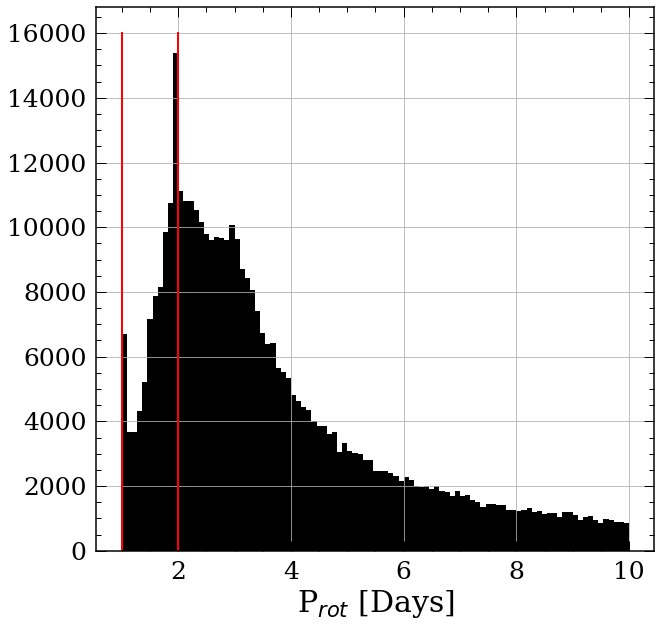

In [251]:
df['maxpowerprot'].hist(bins=np.linspace(1,10,100),color='k')
plt.plot([1,1],[0,16000],'r-')
plt.plot([2,2],[0,16000],'r-')
plt.xlabel('P$_{rot}$ [Days]')

In [304]:
df_filt = df.loc[df['maxpowers']>0.59]
df_filt = df_filt.loc[df_filt['maxpowerprot']>1.1]
print(len(df_filt))


6605


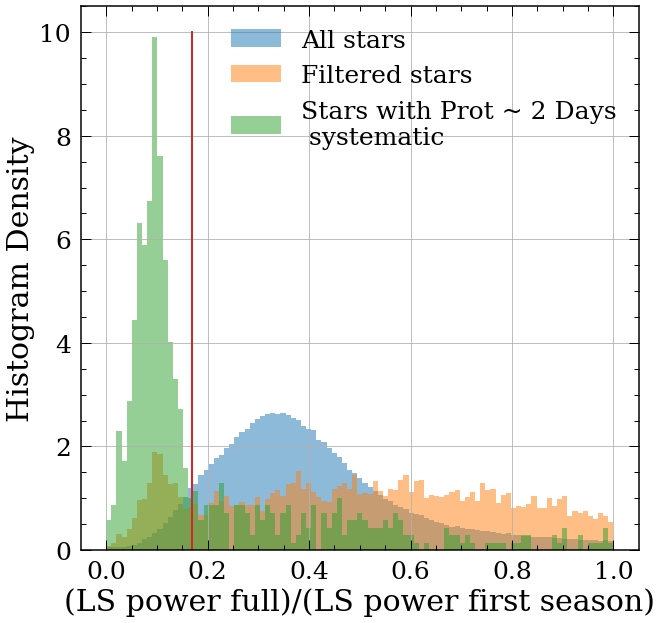

In [305]:
df_filt_2d = df_filt.loc[abs(df_filt['maxpowerprot']-2)<0.1]
(df['maxpower1']/df['maxpower2']).hist(bins=np.linspace(0,1,100),density=True,alpha=0.5,label='All stars')
(df_filt['maxpower1']/df_filt['maxpower2']).hist(bins=np.linspace(0,1,100),density=True,alpha=0.5,label='Filtered stars')
(df_filt_2d['maxpower1']/df_filt_2d['maxpower2']).hist(bins=np.linspace(0,1,100),density=True,alpha=0.5,label='Stars with Prot ~ 2 Days\n systematic')
plt.plot([0.17,0.17],[0,10])
plt.xlabel('(LS power full)/(LS power first season)')
plt.ylabel('Histogram Density')
plt.legend()

In [306]:
df_filt['bias'] = df_filt['maxpower1']/df_filt['maxpower2']
df_filt = df_filt.loc[df_filt['bias']>0.17].reset_index(drop=True)
len(df_filt)

5763

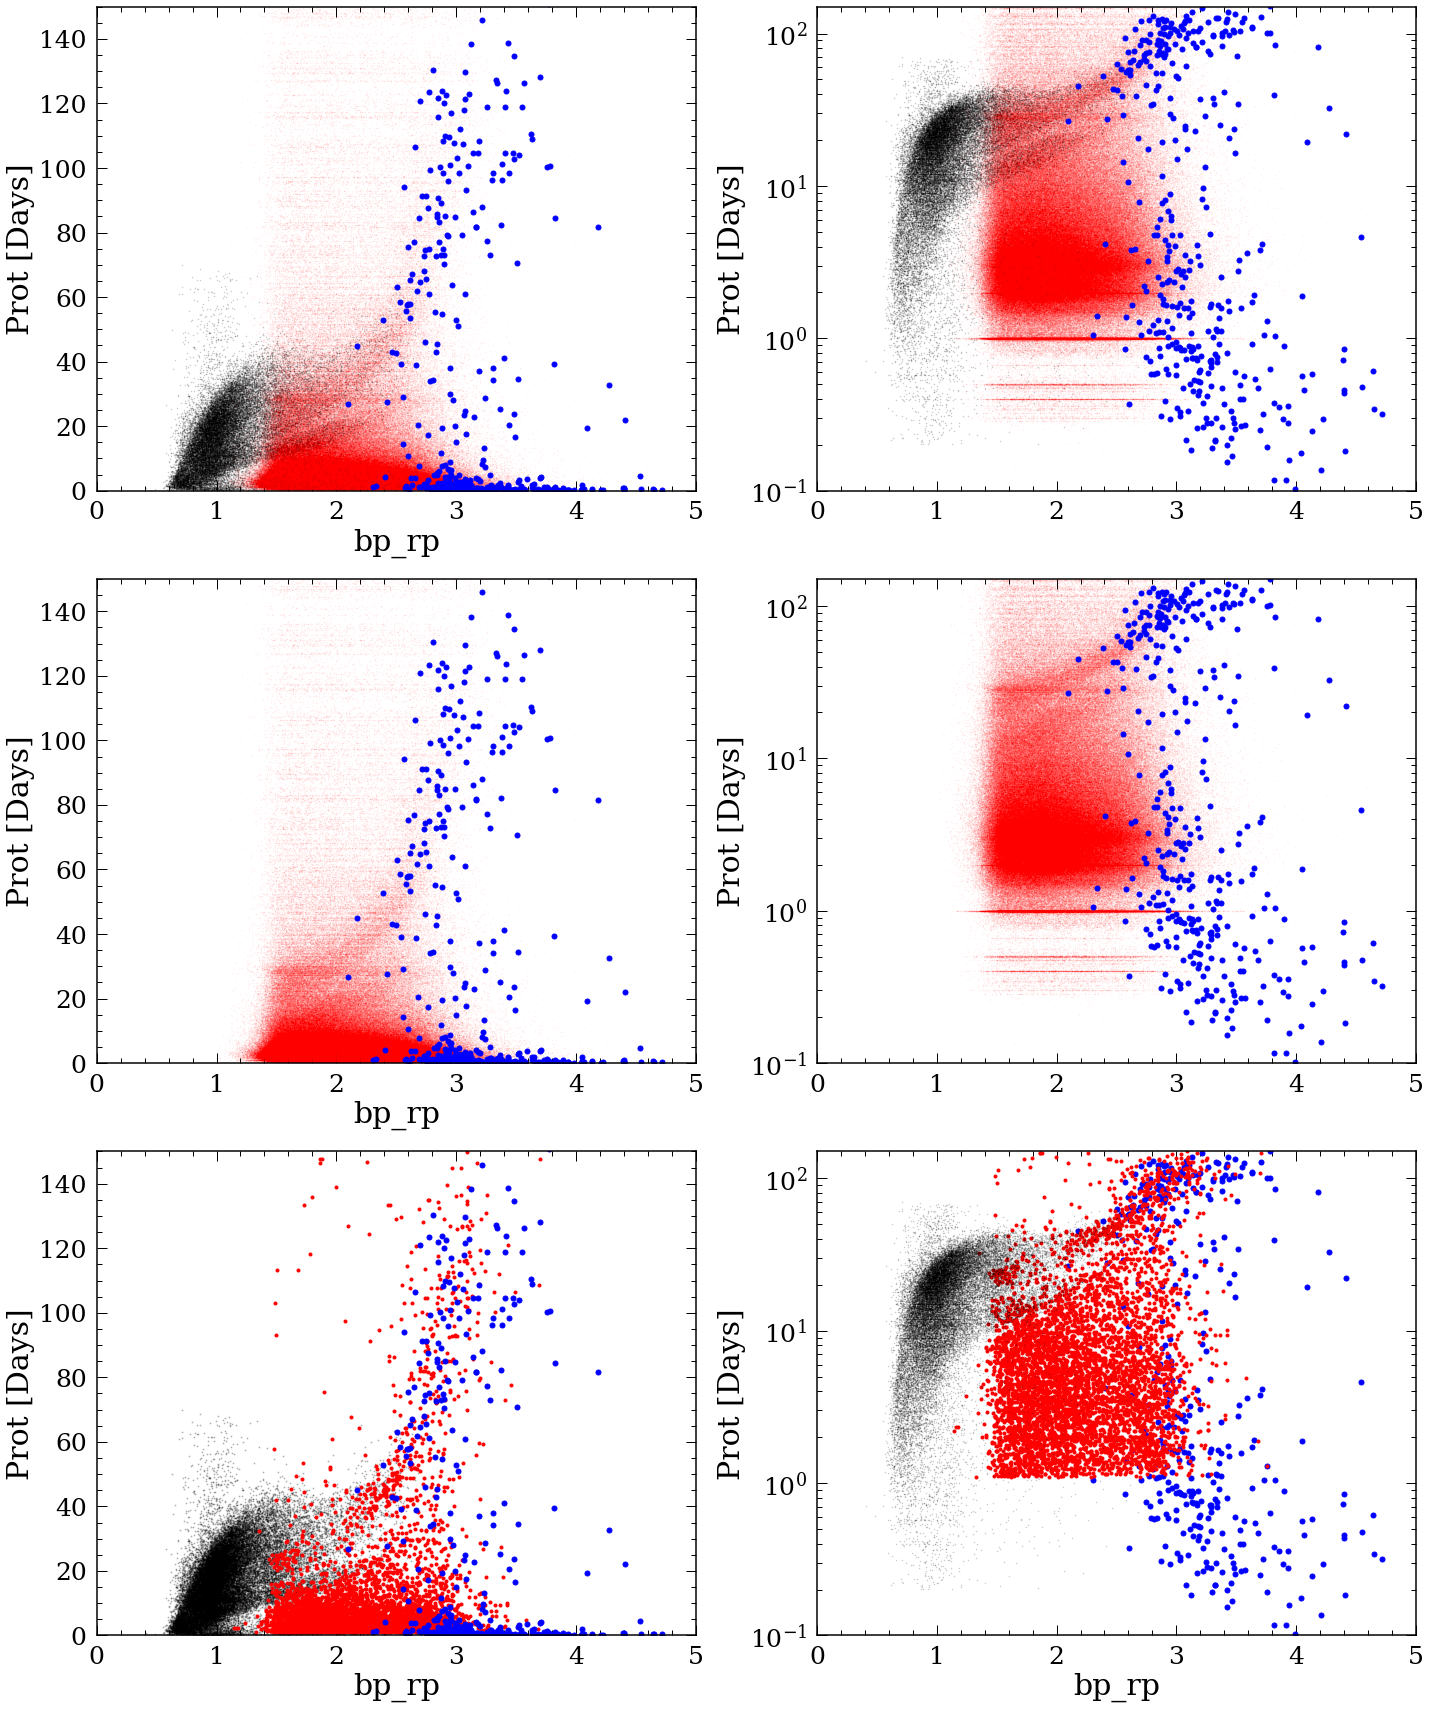

In [307]:
plt.figure(figsize=(20,24))
plt.subplot(3,2,1)
plt.plot(kepler['bp_rp'],kepler['Prot'],'k.',alpha=0.2,markersize=1)
plt.plot(df['bprp'],df['maxpowerprot'],'r.',markersize=0.5, alpha=0.1)
plt.plot(Mearth['BP-RP'],Mearth['Prot'],'b.',markersize=10)
plt.xlabel('bp_rp')
plt.ylim([0,150])
plt.xlim([0,5])
plt.ylabel('Prot [Days]')

plt.subplot(3,2,2)
plt.plot(kepler['bp_rp'],kepler['Prot'],'k.',alpha=0.2,markersize=1)
plt.plot(df['bprp'],df['maxpowerprot'],'r.',markersize=0.5, alpha=0.1)
plt.plot(Mearth['BP-RP'],Mearth['Prot'],'b.',markersize=10)
plt.yscale('log')
plt.ylim([1e-1,150])
plt.xlim([0,5])
plt.ylabel('Prot [Days]')

plt.subplot(3,2,3)
plt.plot(df['bprp'],df['maxpowerprot'],'r.',markersize=0.5, alpha=0.1)
plt.plot(Mearth['BP-RP'],Mearth['Prot'],'b.',markersize=10)
plt.xlabel('bp_rp')
plt.ylim([0,150])
plt.xlim([0,5])
plt.ylabel('Prot [Days]')

plt.subplot(3,2,4)
plt.plot(df['bprp'],df['maxpowerprot'],'r.',markersize=0.5, alpha=0.1)
plt.plot(Mearth['BP-RP'],Mearth['Prot'],'b.',markersize=10)
plt.ylim([1e-1,150])
plt.xlim([0,5])
plt.yscale('log')
plt.ylabel('Prot [Days]')

plt.subplot(3,2,5)
plt.plot(kepler['bp_rp'],kepler['Prot'],'k.',alpha=0.2,markersize=2)
plt.plot(df_filt['bprp'],df_filt['maxpowerprot'],'r.')
plt.plot(Mearth['BP-RP'],Mearth['Prot'],'b.',markersize=10)
plt.xlabel('bp_rp')
plt.ylim([0,150])
plt.xlim([0,5])
plt.ylabel('Prot [Days]')

plt.subplot(3,2,6)
plt.plot(Mearth['BP-RP'],Mearth['Prot'],'b.',markersize=10)
plt.plot(df_filt['bprp'],df_filt['maxpowerprot'],'r.')
plt.plot(kepler['bp_rp'],kepler['Prot'],'k.',alpha=0.2,markersize=1)

plt.yscale('log')
plt.xlabel('bp_rp')
plt.ylim([1e-1,150])
plt.xlim([0,5])
plt.ylabel('Prot [Days]')
plt.tight_layout()
plt.savefig('ZTFgaia.png')

Method Improvement: 11.01%


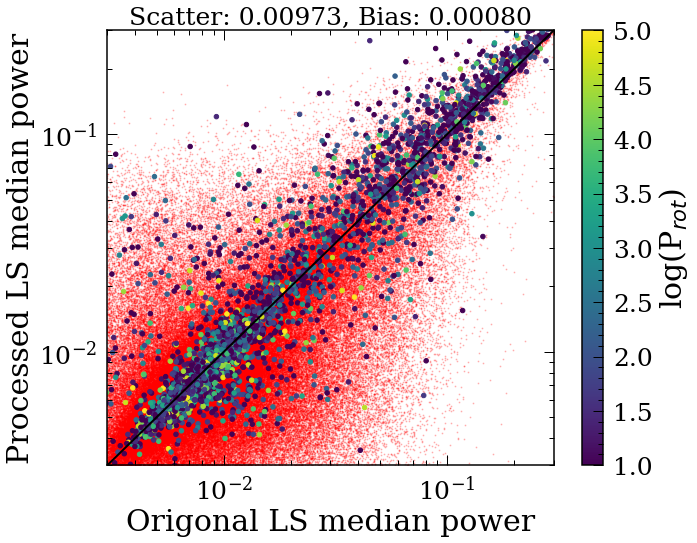

In [308]:
plt.figure(figsize=(10,8))
plt.scatter(df['medpower_org'], df['medpower1'], c='r', s=1, alpha=0.2, 
        label='All Sample')
plt.scatter(df_filt['medpower_org'], df_filt['medpower1'], 
            c=np.log(df_filt['maxpowerprot']),s=20,
            label='LS Power > 0.59',vmin=1, vmax=5)

#plt.plot(df_filt_2d['medpower_org'], df_filt_2d['medpower1'],'bo',markersize=10)

plt.plot([3e-3,0.3], [3e-3,0.3], 'k-')
plt.xlim([3e-3,0.3])
plt.ylim([3e-3,0.3])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Origonal LS median power')
plt.ylabel('Processed LS median power')

df = df.dropna(subset=['medpower_org']).reset_index(drop=True)
df = df.dropna(subset=['medpower1']).reset_index(drop=True)

p = fitpoints(df['medpower_org'], df['medpower1'])
#plt.plot([3e-3,0.3], p([3e-3,0.3]), 'b--')

scat = np.std(df['medpower_org'] - df['medpower1'])
bia = np.mean(df['medpower_org'] - df['medpower1'])
plt.title('Scatter: %.5f, Bias: %.5f'%(scat, bia), fontsize=25)
#plt.legend()
print('Method Improvement: %.2f%%'%(np.mean(df['medpower_org'] - df['medpower1'])/np.median(df['medpower_org'])*100))
cb = plt.colorbar()
cb.set_label('log(P$_{rot}$)')